In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [22]:
# to save the model
# model.save('electronvsgamma.model')
# #Load it back:
# model = tf.keras.models.load_model('model/all_all2.model')

In [23]:
# load numpy array from npy file
from numpy import load
# load array
dset1 = load('files/gamma_image.npy')
dset2 = load('files/electron_image.npy')
dset3 = load('files/proton_image.npy')
dset4 = load('files/helium_image.npy')
dset5 = load('files/nitrogen_image.npy')
dset6 = load('files/iron_image.npy')
dset7 = load('files/silicon_image.npy')


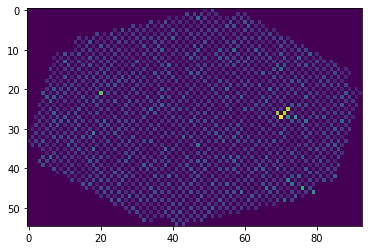

In [24]:
# Plot a image from any particle
import matplotlib.pyplot as plt
plt.imshow(dset3[3], interpolation='none',aspect='auto')#,cmap=plt.cm.binary
fig_size = plt.rcParams["figure.figsize"]
plt.show()

# split data

In [25]:
%%time
    
target1=np.zeros(dset1.shape[0]) #esto es gamma
target2=np.ones(dset2.shape[0])
target3=2*np.ones(dset3.shape[0])
target4=3*np.ones(dset4.shape[0])
target5=4*np.ones(dset5.shape[0])
target6=5*np.ones(dset6.shape[0])
target7=6*np.ones(dset7.shape[0])

target=np.concatenate((target1, target2, target3, target4, target5, target6, target7), axis=0)
#put the dataset together
data=np.concatenate((dset1,dset2,dset3,dset4,dset5,dset6,dset7),axis=0)

Wall time: 750 ms


In [26]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=3)  

In [27]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# input image dimensions
imgRows, imgCols = 55, 93
numChannels=1
samples=X_train.shape[0]
numClasses=7

x_train=X_train
x_test=X_test

#PARA PONER LOS CANALES AL PPO
# x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
# x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
# input_shape = (1, img_rows, img_cols)

x_train = x_train.reshape(x_train.shape[0], imgRows, imgCols, numChannels)
x_test = x_test.reshape(x_test.shape[0], imgRows, imgCols, numChannels)
input_shape = (imgRows, imgCols, numChannels)

# convert class vectors to binary class matrices
y_train_c = keras.utils.to_categorical(y_train, numClasses)
y_test_c = keras.utils.to_categorical(y_test, numClasses)


In [15]:
#put x_train with filters rgb (required to use keras applications for transfer learning)
from keras import backend as K

def grayscale_to_rgb(images, channel_axis=-1):
#     images= K.expand_dims(images, axis=channel_axis)
    tiling = [1] * 4    # 4 dimensions: B, H, W, C
    tiling[channel_axis] *= 3
    images= K.tile(images, tiling)
    return images

x_train_3=grayscale_to_rgb(x_train)
x_test_3=grayscale_to_rgb(x_test)

In [16]:
#this is in case I want to resize the images for transfer learning for example.
x_train_n3=tf.image.resize(x_train_3, [96,96], preserve_aspect_ratio=False)
x_test_n3=tf.image.resize(x_test_3, [96,96],preserve_aspect_ratio=False)

In [17]:
#put everything in numpy
x_train_3=x_train_3.numpy()
x_test_3=x_test_3.numpy()
x_train_n3=x_train_n3.numpy()
x_test_n3=x_test_n3.numpy()

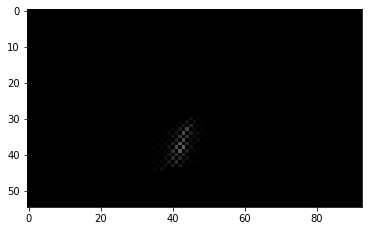

In [18]:
# plt.figure(figsize=(5,5))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train_n3.numpy()[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[y_train[i]])

plt.imshow((x_train_3[6]))
plt.show()

# Model 1: FC NN

In [19]:
# from keras import regularizers
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.6))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.6))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.6))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(7, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
%%time
hist=model.fit(x_train, y_train, epochs=19, validation_data=(x_test, y_test)) #epochs es el numero de iteraciones hasta alcanzar un loss minimo

Train on 22155 samples, validate on 5539 samples
Epoch 1/19
22155/22155 [==============================] - 6s 277us/sample - loss: 0.8107 - accuracy: 0.6443 - val_loss: 0.7864 - val_accuracy: 0.6604
Epoch 2/19
22155/22155 [==============================] - 7s 331us/sample - loss: 0.8094 - accuracy: 0.6458 - val_loss: 0.8590 - val_accuracy: 0.6322
Epoch 3/19
22155/22155 [==============================] - 6s 260us/sample - loss: 0.8062 - accuracy: 0.6469 - val_loss: 0.8036 - val_accuracy: 0.6752
Epoch 4/19
22155/22155 [==============================] - 6s 282us/sample - loss: 0.8066 - accuracy: 0.6515 - val_loss: 0.7939 - val_accuracy: 0.6711
Epoch 5/19
22155/22155 [==============================] - 6s 285us/sample - loss: 0.8000 - accuracy: 0.6486 - val_loss: 0.8005 - val_accuracy: 0.6501
Epoch 6/19
22155/22155 [==============================] - 6s 293us/sample - loss: 0.7966 - accuracy: 0.6519 - val_loss: 0.7882 - val_accuracy: 0.6703
Epoch 7/19
22155/22155 [===========================

In [20]:
val_loss, val_acc = model.evaluate(X_test, y_test)
# print(val_loss)
print(val_acc)
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

5539/5539 [==============================] - 1s 107us/sample - loss: 0.8004 - accuracy: 0.6716
0.67160136
[[2422    0    0    1    0    1    0]
 [   4  284  125   20   51   51    0]
 [   1   35  456   72  100   99    0]
 [   0    0  266   86  142  140    0]
 [   0    0   19   21  121  249    0]
 [   0    0    4    2   60  351    0]
 [   0    0    5   14   67  270    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2424
         1.0       0.89      0.53      0.67       535
         2.0       0.52      0.60      0.56       763
         3.0       0.40      0.14      0.20       634
         4.0       0.22      0.30      0.25       410
         5.0       0.30      0.84      0.44       417
         6.0       0.00      0.00      0.00       356

    accuracy                           0.67      5539
   macro avg       0.48      0.49      0.45      5539
weighted avg       0.68      0.67      0.65      5539



C:\Users\HP\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


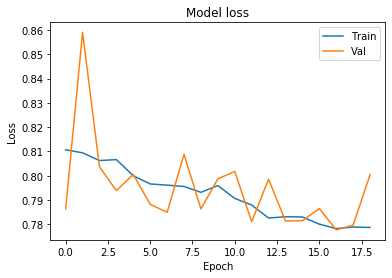

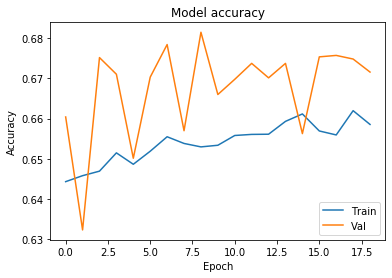

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# model 2: CNN

In [32]:
def create_model(padding='same',stride=1,pool=3,filters=32,kernel=3,hidden_layers=1,neurons=20,optimizer='Adadelta',
                 learn_rate=0.001, init_mode='glorot_normal', activation='relu', dropout_rate=0.3,
                 weight_constraint=None,weight_regularizer=None, batchn=0,conv=2, n_filters=2):#parameters here are default

    #los weight_initializer son mas optimos dependiendo de la funcion de activacion
   # initialize the model
    model = Sequential()                                                                       

    for i in range (conv):
        num=int(round(filters*(2**(i-1))))
        for i in range (n_filters):
              model.add(Conv2D(num, kernel, padding=padding,activation=activation,kernel_initializer=init_mode,kernel_constraint=weight_constraint,kernel_regularizer=weight_regularizer))
        model.add(MaxPooling2D(pool_size=(pool, pool), strides=(stride, stride)))
        # model.add(Dropout(dropout_rate))
    # define the first FC => ACTIVATION layers
    model.add(Flatten())
    if (batchn==1):
        model.add(BatchNormalization())     
    model.add(Dropout(dropout_rate)) 
    for i in range(hidden_layers):
        model.add(Dense(neurons,kernel_initializer=init_mode,  activation=activation,kernel_regularizer=weight_regularizer)) 
        if (batchn==1):
            model.add(BatchNormalization())    #, use_bias=False
        model.add(Dropout(dropout_rate)) 
    # lastly, define the soft-max classifier
    model.add(Dense(numClasses, activation='softmax'))

    if (optimizer=='SGD'):
        optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    elif (optimizer=='RMS'):
        optimizer=keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    elif (optimizer=='Adagrad'):
        optimizer=keras.optimizers.Adagrad(learning_rate=0.01)
    elif (optimizer=='Adadelta'):
        optimizer=keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
    elif (optimizer=='Adamax'):
        optimizer=keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Nadam'):
        optimizer=keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
    elif (optimizer=='Adam'):
        optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])              

    return model


In [33]:
shape=x_train.shape
model=create_model()
model.build(shape) 
model.summary()
model=create_model()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (22155, 55, 93, 16)       160       
_________________________________________________________________
conv2d_34 (Conv2D)           (22155, 55, 93, 16)       2320      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (22155, 53, 91, 16)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (22155, 53, 91, 32)       4640      
_________________________________________________________________
conv2d_36 (Conv2D)           (22155, 53, 91, 32)       9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (22155, 51, 89, 32)       0         
_________________________________________________________________
flatten_9 (Flatten)          (22155, 145248)          

In [34]:
%%time
history=model.fit(x_train, y_train, epochs=30,batch_size=128, validation_data=(x_test, y_test))

Train on 22155 samples, validate on 5539 samples
Epoch 1/30
22155/22155 [==============================] - 597s 27ms/step - loss: 1.0125 - accuracy: 0.5677 - val_loss: 0.8694 - val_accuracy: 0.6220
Epoch 2/30
22155/22155 [==============================] - 576s 26ms/step - loss: 0.8987 - accuracy: 0.6106 - val_loss: 0.9996 - val_accuracy: 0.5978
Epoch 3/30
22155/22155 [==============================] - 523s 24ms/step - loss: 0.8611 - accuracy: 0.6306 - val_loss: 0.8453 - val_accuracy: 0.6485
Epoch 4/30
22155/22155 [==============================] - 507s 23ms/step - loss: 0.8455 - accuracy: 0.6390 - val_loss: 0.7922 - val_accuracy: 0.6786
Epoch 5/30
22155/22155 [==============================] - 490s 22ms/step - loss: 0.8391 - accuracy: 0.6424 - val_loss: 0.7920 - val_accuracy: 0.6712
Epoch 6/30
22155/22155 [==============================] - 488s 22ms/step - loss: 0.8247 - accuracy: 0.6510 - val_loss: 0.7982 - val_accuracy: 0.6759
Epoch 7/30
22155/22155 [==============================] -

KeyboardInterrupt: 

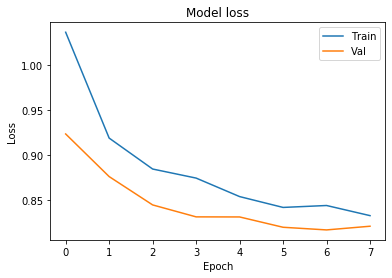

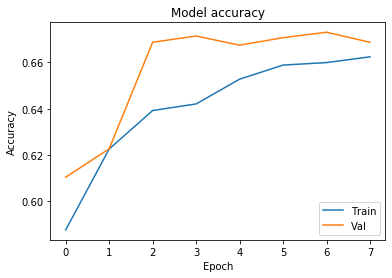

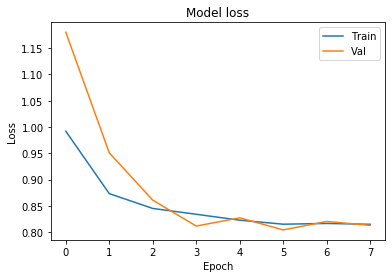

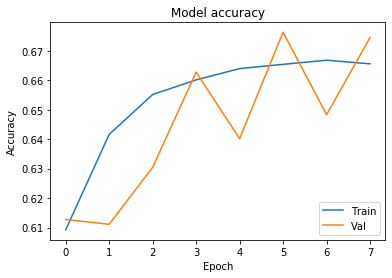

In [45]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [46]:
val_loss, val_acc = model.evaluate(x_test, y_test)
# print(val_loss)
print(val_acc)
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

5539/5539 [==============================] - 5s 890us/step
0.6744899749755859
[[2417    5    2    0    0    0    0]
 [   3  310   97    6    5  107    7]
 [   0   47  396  143   18  142   17]
 [   0    3  215  173   32  191   20]
 [   0    0   17   43   29  301   20]
 [   0    0    5    3    4  400    5]
 [   0    0    9   13   10  313   11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2424
         1.0       0.85      0.58      0.69       535
         2.0       0.53      0.52      0.53       763
         3.0       0.45      0.27      0.34       634
         4.0       0.30      0.07      0.11       410
         5.0       0.28      0.96      0.43       417
         6.0       0.14      0.03      0.05       356

    accuracy                           0.67      5539
   macro avg       0.51      0.49      0.45      5539
weighted avg       0.70      0.67      0.66      5539



In [23]:
#SAVE RESULTS
# history = pd.DataFrame(history2.history)
# history.to_csv('history/history_2.csv', index=False)
# #LOAD RESULTS
# import pandas as pd
# import csv
# history = pd.read_csv('history/history.csv', delimiter=',')

# SAVE THE MODEL
# model.save('model/all_all_2.model')
# #Load it back:
model = tf.keras.models.load_model('model/all_all_2.model')

# Results

In [22]:
class_names = ['gamma', 'electron', 'proton', 'helium', 'nitrogen',
               'iron', 'silicon']

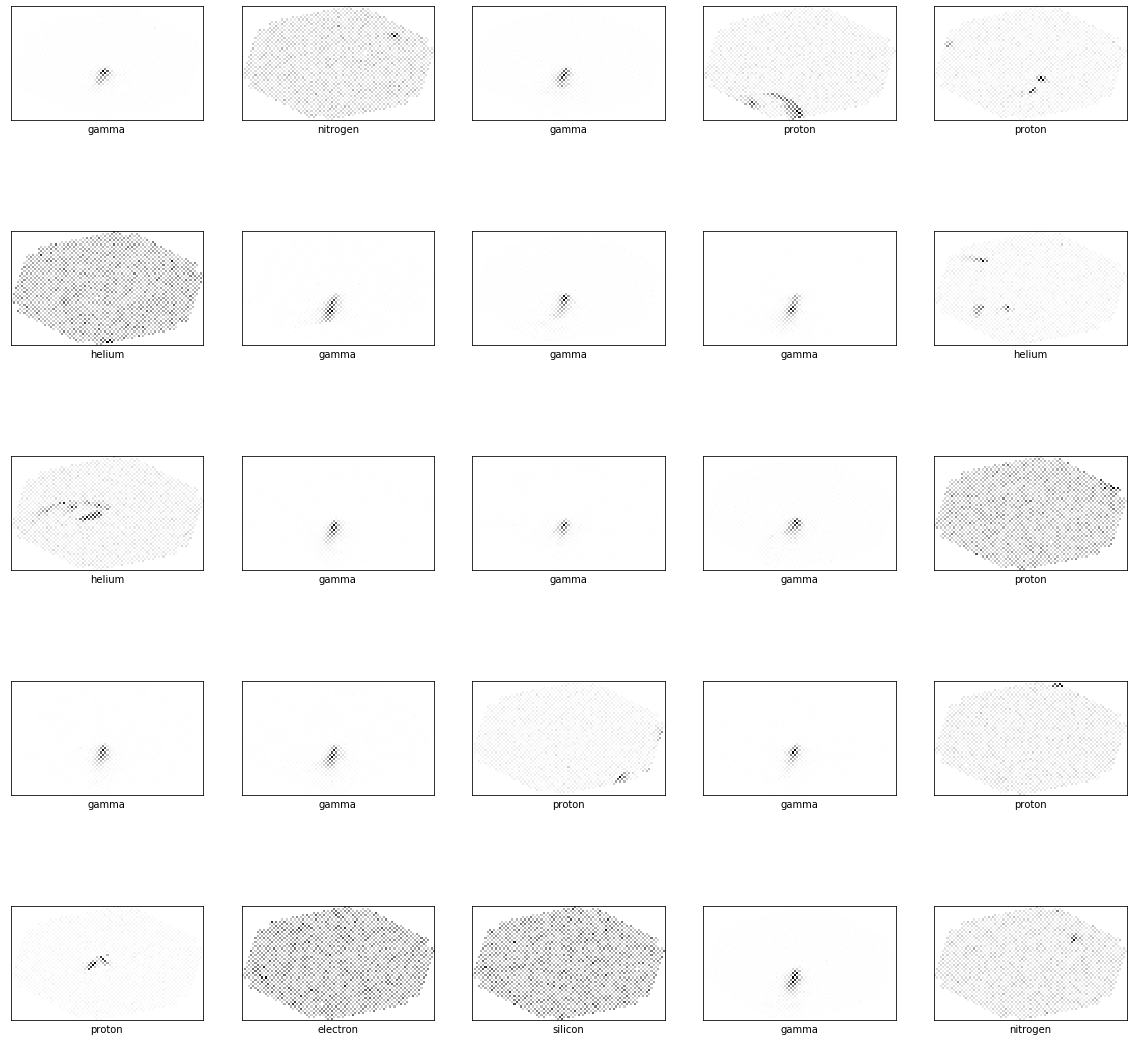

In [23]:
#show images in general

y_train=y_train.astype(int)
y_test=y_test.astype(int)
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [24]:
predictions = model.predict(x_test)
print(predictions[0])
np.argmax(predictions[0])
y_pred = model.predict_classes(x_test)

[1.72558750e-04 1.04704365e-01 2.84679741e-01 2.77020097e-01
 1.63249552e-01 7.47946501e-02 9.53791067e-02]


In [25]:
#define a function to create images that show classification


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)#, cmap=plt.cm.binary

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [26]:
# i = 1
# plt.figure(figsize=(18,9))
# plt.subplot(1,2,1)
# plot_image(i, predictions[i], y_test, X_test)
# plt.subplot(1,2,2)
# plot_value_array(i, predictions[i],  y_test)
# plt.show()

In [33]:
#For instance, here I can select bad  for a certain praticle

index=np.where((y_test==6)&(y_pred!=y_test)) [0]
index2=np.where(y_test==2)[0]
# index=np.concatenate([index1,index2])
index=np.sort(index)
incorrect = np.where(y_pred!=y_test)[0]
correct = np.where(y_pred==y_test)[0]
len(index)

356

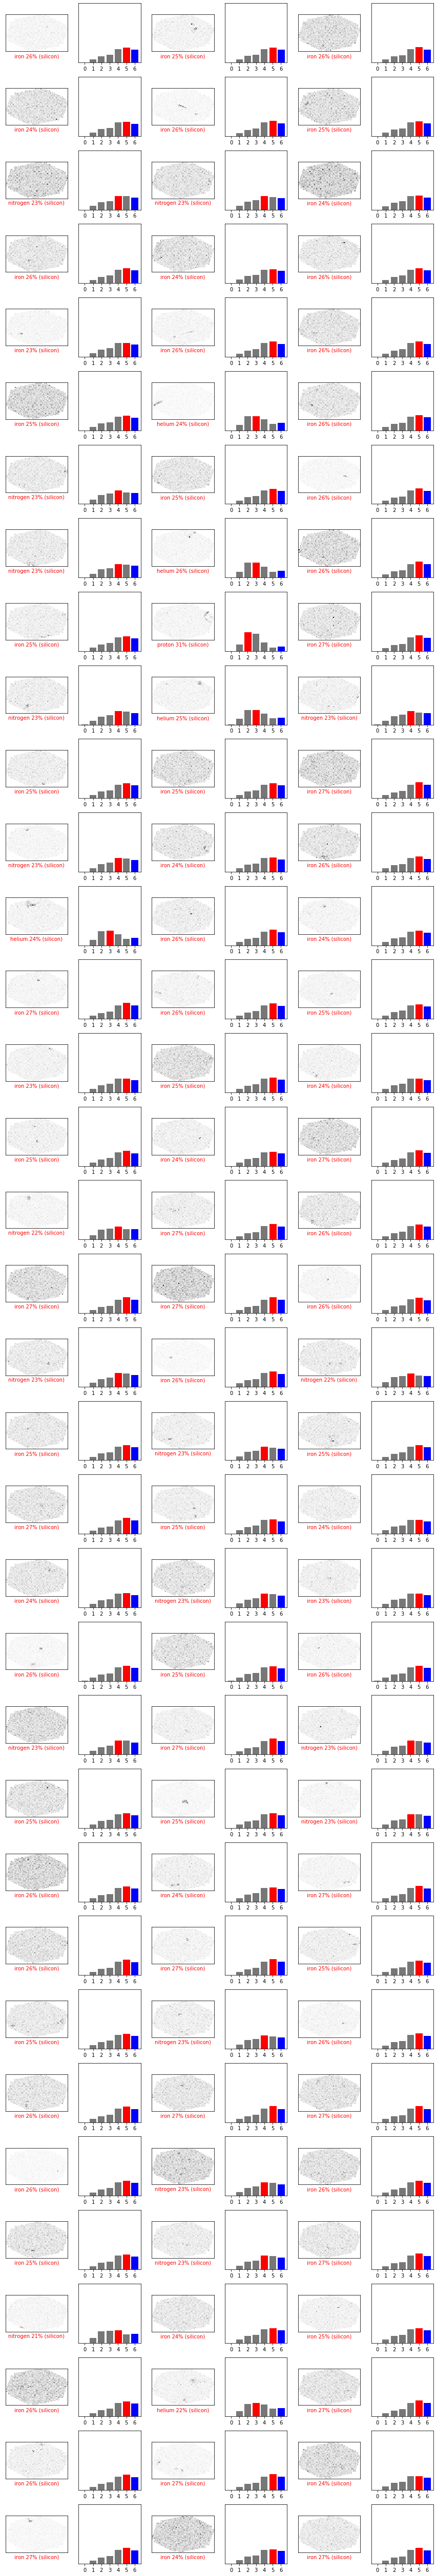

In [34]:
num_rows = 35
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[index][i], y_test[index], X_test[index])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[index][i],  y_test[index])
plt.tight_layout()
plt.show()

# model 3. Transfer learning

In [25]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications import Xception
from keras.applications import InceptionResNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam


In [26]:
# base_model = InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(110, 186,3))
# base_model = InceptionResNetV2(weights=None,include_top=False)
# base_model=keras.applications.xception.Xception(include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=7)
base_model=keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(96,96,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dropout(0.5)(x)
x=Dense(512,activation='relu')(x) #dense layer 2
x = Dropout(0.5)(x)
preds=Dense(7,activation='softmax')(x) #final layer with softmax activation

In [27]:
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 47, 47, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 47, 47, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 47, 47, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

activation_158 (Activation)     (None, 1, 1, 384)    0           batch_normalization_158[0][0]    
__________________________________________________________________________________________________
activation_160 (Activation)     (None, 1, 1, 288)    0           batch_normalization_160[0][0]    
__________________________________________________________________________________________________
activation_163 (Activation)     (None, 1, 1, 320)    0           batch_normalization_163[0][0]    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 1, 1, 1088)   0           block17_20_ac[0][0]              
__________________________________________________________________________________________________
mixed_7a (Concatenate)          (None, 1, 1, 2080)   0           activation_158[0][0]             
                                                                 activation_160[0][0]             
          

In [15]:
for layer in model.layers[:50]:
    layer.trainable=False
for layer in model.layers[50:]:
    layer.trainable=True

In [16]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
# history=model.fit(x_train_n3.numpy(), y_train_c, epochs=4,batch_size=128, validation_data=(x_test_n3.numpy(), y_test_c))
history=model.fit(x_train_n3, y_train_c, epochs=8,batch_size=128, validation_data=(x_test_n3, y_test_c))

Train on 22155 samples, validate on 5539 samples
Epoch 1/8
22155/22155 [==============================] - 2980s 135ms/step - loss: 0.9790 - accuracy: 0.5839 - val_loss: 2.9021 - val_accuracy: 0.0753
Epoch 2/8
22155/22155 [==============================] - 2967s 134ms/step - loss: 0.7751 - accuracy: 0.6634 - val_loss: 3.4958 - val_accuracy: 0.0753
Epoch 3/8
22155/22155 [==============================] - 2984s 135ms/step - loss: 0.6924 - accuracy: 0.6988 - val_loss: 3.7969 - val_accuracy: 0.0643
Epoch 4/8
22155/22155 [==============================] - 2964s 134ms/step - loss: 0.6138 - accuracy: 0.7345 - val_loss: 3.6189 - val_accuracy: 0.0643
Epoch 5/8
22155/22155 [==============================] - 2956s 133ms/step - loss: 0.5090 - accuracy: 0.7800 - val_loss: 3.9132 - val_accuracy: 0.0643
Epoch 6/8
22155/22155 [==============================] - 2966s 134ms/step - loss: 0.4169 - accuracy: 0.8257 - val_loss: 4.1680 - val_accuracy: 0.0643
Epoch 7/8
22155/22155 [============================

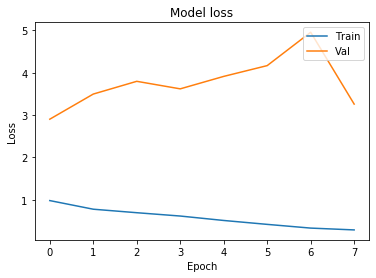

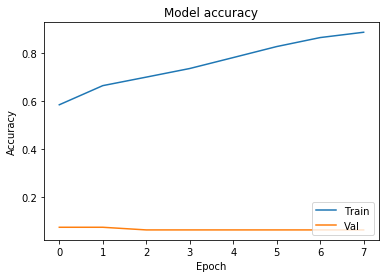

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Grid search

In [9]:
# PARAMETERS  SI QUIERO CUALQUIER PARAMETRO QUE NO SEA EL DEFAULT LO PONGO AQUI ABAJO

# batch_size = [64]#[128,264]
# epochs = [500]
optimizer = ['Adam','SGD','Adadelta']#['Nadam','Adagrad','SGD', 'RMSprop', 'Adagrad', 'Adadelta',  'Adamax', 'Nadam']
# learn_rate = [0.001,0.0001]#[0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0]#[0.0, 0.2, 0.4, 0.6, 0.8, 0.9]  #en este caso momentum es para SGD por ej., para adam solo se usa learn. rate
activation = ['relu','elu']#['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
init_mode = ['glorot_normal','lecun_uniform']#['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
dropout_rate =[0,0.2,0.4,0.6] 
neurons = [15,128,500, 1000] #[5, 10, 15, 20, 25, 30]
hidden_layers= [1,2]
# padding=['valid', 'same']
stride=[1,2]
pool=[2,4]
filters=[32,64]
kernel=[3,5,7]
# weight_regularizer=[regularizers.l2(0.001) , None]
# weight_constraint=[MaxNorm(), None]
# batchn=[0,1]
conv=[1,2,4,6]

param_grid = dict(stride=stride,pool=pool,filters=filters,kernel=kernel)

In [10]:
%%time
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#CREATE THE MODEL FOR GRID SEARCH
model = KerasClassifier(build_fn=create_model, epochs=60, batch_size=64, verbose=2) #if I add any param here has to be also in the model(there has to be a default value)#the values that I set here are definitive

#FIT GRID SEARCH. WITH THE PARAMETERS_GRID, I CAN MODIFY ANY PARAMETER
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2,verbose=2)

# FIT RANDOM GRID SEARCH
# grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=2, n_iter=10)

grid_result = grid.fit(x_train, y_train,callbacks=[EarlyStoppingAtMinLoss()])

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 276.3min finished


Epoch 1/10
 - 146s - loss: 0.9214 - accuracy: 0.6029
Epoch 2/10
 - 142s - loss: 0.8198 - accuracy: 0.6419
Epoch 3/10
 - 142s - loss: 0.7944 - accuracy: 0.6551
Epoch 4/10
 - 141s - loss: 0.7688 - accuracy: 0.6718
Epoch 5/10
 - 140s - loss: 0.7570 - accuracy: 0.6777
Epoch 6/10
 - 140s - loss: 0.7420 - accuracy: 0.6837
Epoch 7/10
 - 139s - loss: 0.7334 - accuracy: 0.6886
Epoch 8/10
 - 139s - loss: 0.7268 - accuracy: 0.6924
Epoch 9/10
 - 139s - loss: 0.7205 - accuracy: 0.6951
Epoch 10/10
 - 139s - loss: 0.7160 - accuracy: 0.6969
Wall time: 4h 59min 44s


In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.679305 using {'dropout_rate': 0.2, 'init_mode': 'glorot_normal', 'learn_rate': 0.0001}


In [12]:
#SAVE RESULTS
results = pd.DataFrame(grid_result.cv_results_)
results.to_csv('grid_search_1.csv', index=False)

In [ ]:
#LOAD RESULTS
import pandas as pd
import csv
results = pd.read_csv('grid_search_1', delimiter=',')


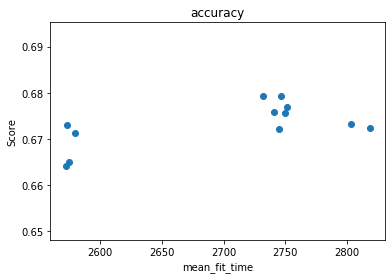

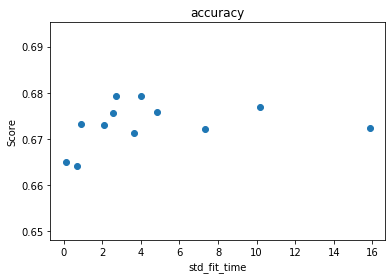

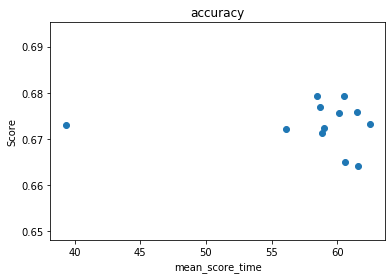

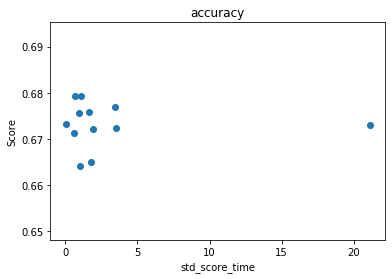

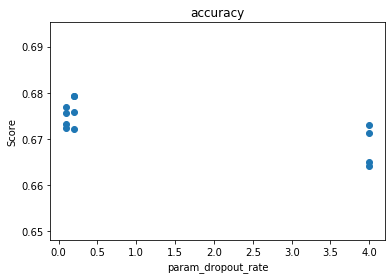

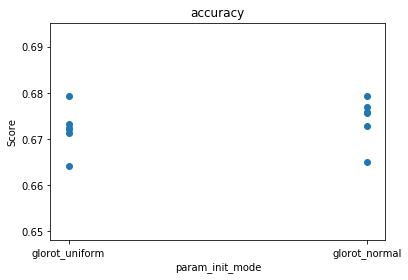

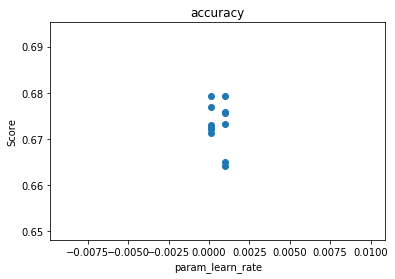

TypeError: float() argument must be a string or a number, not 'dict'

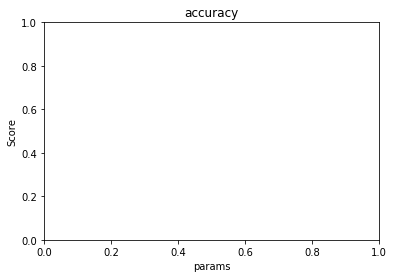

In [13]:
#PLOTS
from matplotlib import pyplot
import matplotlib.pyplot as plt
#first get the name o the columns
lista=[]
for col in results.columns: 
    lista.append(col)
count=0
for i in results:
    # plot learning curves
    pyplot.title('accuracy')
    pyplot.xlabel(str(lista[count]))
    pyplot.ylabel('Score')
    pyplot.scatter(results[i],results['mean_test_score'] )
    pyplot.show()
    count=count+1

# Grid Search with Tensorboard

In [ ]:
#RECORDAR CAMBIAR DONDE PONE VAL_ACCURACY POR ACCURACY

# Load the TensorBoard notebook extension
%reload_ext tensorboard

In [ ]:
# Clear any logs from previous runs
# !rm -rf ./logs/hparam_tuning2

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [ ]:
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
# HP_STRIDE = hp.HParam('stride', hp.Discrete([1,2]))
# HP_POOL = hp.HParam('pool', hp.Discrete([4,2]))
# HP_FILTERS = hp.HParam('filters', hp.Discrete([32,64]))
# HP_KERNEL = hp.HParam('kernel', hp.Discrete([3,5,7]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1,0.2,0.4,0.6]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['Adam', 'SGD','Adadelta']))
HP_CONV = hp.HParam('conv', hp.Discrete([1,2,4,6]))

METRIC_ACCURACY = 'accuracy'
METRIC_VAL_ACCURACY = 'val_accuracy'



with tf.summary.create_file_writer('logs/hparam_tuning/0').as_default():
  hp.hparams_config(
    hparams=[HP_DROPOUT,HP_OPTIMIZER,HP_CONV],
    metrics=[hp.Metric(METRIC_VAL_ACCURACY, display_name='val_Accuracy')],
  )

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    val_accuracy = create_model(hparams)
    tf.summary.scalar(METRIC_VAL_ACCURACY,val_accuracy, step=1)

In [ ]:
# model.fit(x_train, y_train, epochs=100,batch_size=128, validation_data=(x_test, y_test),
#         callbacks=[tf.keras.callbacks.TensorBoard(logdir),  # log metrics
#         hp.KerasCallback(logdir, hparams),  # log hparams
#     ],)

In [ ]:
session_num = 0
# for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
for dropout in HP_DROPOUT.domain.values:
  for optimizer in HP_OPTIMIZER.domain.values:
    for conv in HP_CONV.domain.values:
      # for filters in HP_FILTERS.domain.values:

        hparams = {
            HP_DROPOUT: dropout,
            HP_OPTIMIZER: optimizer,
            HP_CONV: conv,
            # HP_FILTERS: filters,
        }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run('logs/hparam_tuning/0/' + run_name, hparams)
        session_num += 1

In [ ]:
%tensorboard --logdir logs/hparam_tuning/0